<a href="https://colab.research.google.com/github/swatimaurya19/outlook_project/blob/main/outlook_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Sales data load karna
data = pd.read_csv('/ecommerce_sales_data.csv')
print(data.head())

# Missing values ko handle karna
data.dropna(inplace=True)

# Date column ko datetime format mein convert karna
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='%d/%m/%Y')

# New features create karna (e.g., Month, Year)
data['Month'] = data['Purchase Date'].dt.month
data['Year'] = data['Purchase Date'].dt.year

print(data.head())



                               Order ID Product Name       Category   Price  \
0  261e3740-c0e9-42b1-bf87-881ac950fa3a     audience  Home & Garden  766.85   
1  0b332b34-46dc-4eaf-a808-fec7e97ffbc6         such       Clothing  331.42   
2  432e0b36-724d-4521-85ae-f66db8af8105         read       Clothing  708.10   
3  ca20fb08-5c65-43b8-9577-3fa49913f93b        skill    Electronics  774.09   
4  1dce189c-8c60-455f-a6f2-69bb2cb71539         cold    Electronics  397.22   

   Quantity  Total Sales                           Customer ID  Customer Age  \
0         4      3067.40  81af1248-afff-46ee-a091-81cf33d0d957            39   
1         4      1325.68  f3f3f4ac-7ad0-4362-9134-383096d16ac8            21   
2        10      7081.00  c4fc4269-3c1d-4b6b-ad23-d437c328d63f            27   
3         2      1548.18  578e2d1a-d92a-449d-8eeb-b704110b2975            51   
4         1       397.22  dc6ed196-0874-46bd-bbb9-c5534f619349            45   

  Customer Gender Purchase Date Purchase Tim

                               Order ID Product Name       Category   Price  \
0  261e3740-c0e9-42b1-bf87-881ac950fa3a     audience  Home & Garden  766.85   
1  0b332b34-46dc-4eaf-a808-fec7e97ffbc6         such       Clothing  331.42   
2  432e0b36-724d-4521-85ae-f66db8af8105         read       Clothing  708.10   
3  ca20fb08-5c65-43b8-9577-3fa49913f93b        skill    Electronics  774.09   
4  1dce189c-8c60-455f-a6f2-69bb2cb71539         cold    Electronics  397.22   

   Quantity  Total Sales                           Customer ID  Customer Age  \
0         4      3067.40  81af1248-afff-46ee-a091-81cf33d0d957            39   
1         4      1325.68  f3f3f4ac-7ad0-4362-9134-383096d16ac8            21   
2        10      7081.00  c4fc4269-3c1d-4b6b-ad23-d437c328d63f            27   
3         2      1548.18  578e2d1a-d92a-449d-8eeb-b704110b2975            51   
4         1       397.22  dc6ed196-0874-46bd-bbb9-c5534f619349            45   

  Customer Gender Purchase Date Purchase Tim

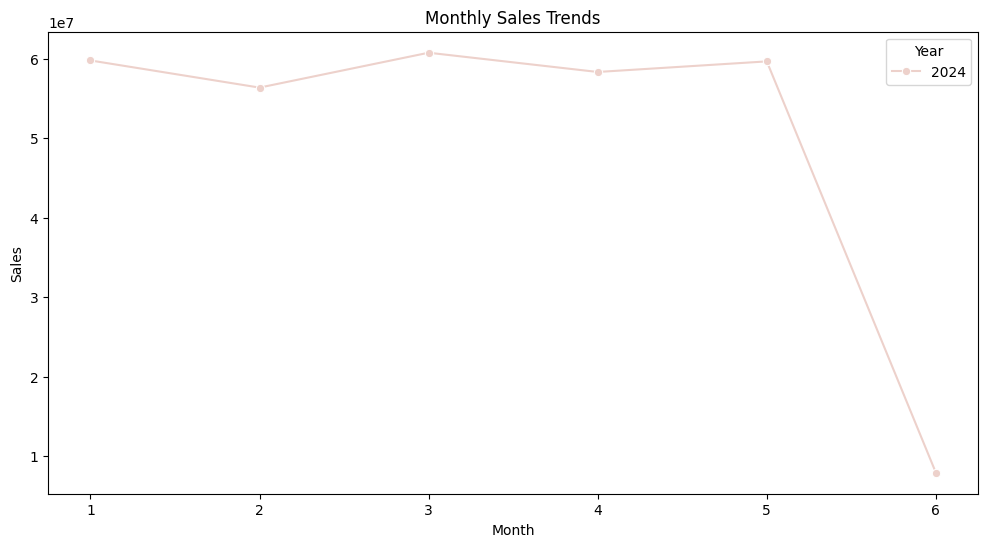

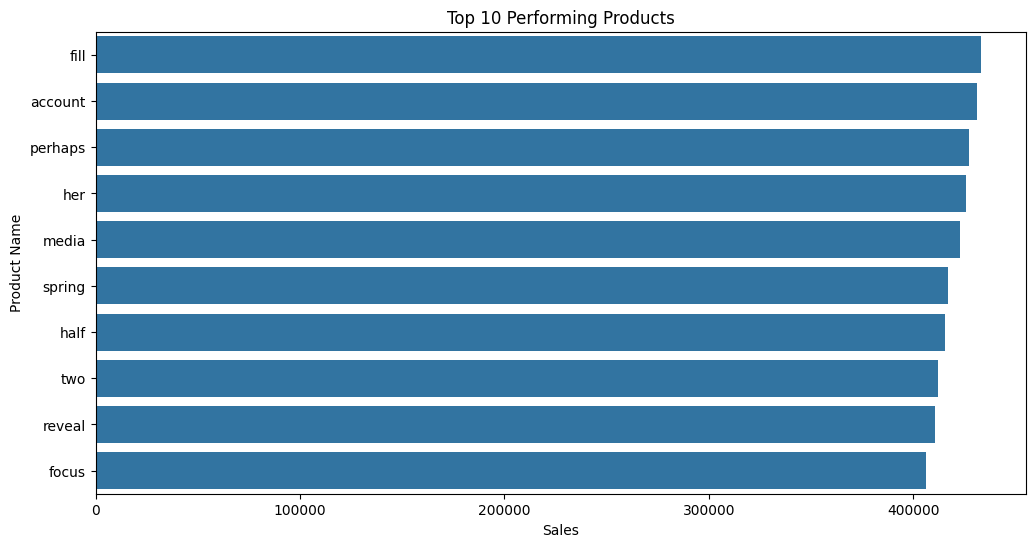

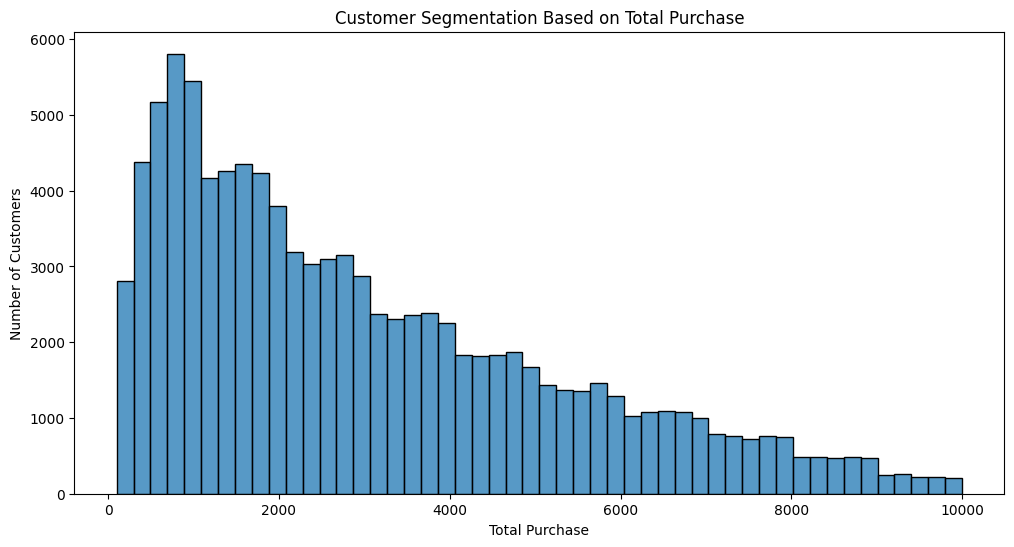

MAE: 35748029.07899998
MSE: 1315765669094249.8


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data
data = pd.read_csv('/ecommerce_sales_data.csv')
print(data.head())
print(data.dtypes)

# Data Preprocessing
data.dropna(inplace=True)
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='%d/%m/%Y')
data['Month'] = data['Purchase Date'].dt.month
data['Year'] = data['Purchase Date'].dt.year

# Convert 'Total Sales' to numeric if it's not already
data['Total Sales'] = pd.to_numeric(data['Total Sales'], errors='coerce')

# Verify column types again
print(data.dtypes)

# Monthly sales trends visualization
monthly_sales = data.groupby(['Year', 'Month']).agg({'Total Sales': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Sales', hue='Year', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Top 10 products by sales
top_products = data.groupby('Product Name').agg({'Total Sales': 'sum'}).sort_values('Total Sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products['Total Sales'], y=top_products.index)
plt.title('Top 10 Performing Products')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

# Customer segmentation based on total purchase
customer_segmentation = data.groupby('Customer ID').agg({'Total Sales': 'sum'})

# Visualize customer segmentation
plt.figure(figsize=(12, 6))
sns.histplot(customer_segmentation['Total Sales'], bins=50)
plt.title('Customer Segmentation Based on Total Purchase')
plt.xlabel('Total Purchase')
plt.ylabel('Number of Customers')
plt.show()

# Predictive Modeling
X = monthly_sales[['Month', 'Year']]
y = monthly_sales['Total Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model performance
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

# Export processed data
data.to_csv('processed_ecommerce_sales_data.csv', index=False)

